In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab,six,matplotlib 
from matplotlib import markers,lines,colors
from scipy import interpolate
mk=np.tile(markers.MarkerStyle.filled_markers,3)
ck=list(six.iteritems(colors.cnames))
matplotlib.rc('font',family='serif',size=9)
from matplotlib2tikz import save as tikz_save
import ht

lk = np.tile(['-', '--', '-.', ':'],4)
mk=np.tile(['o','s','<','D','>','h','p','x','d','^'],3)
ck= plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['ytick.labelsize'] = 16;
mpl.rcParams['font.family'] = 'serif';
mpl.rcParams['axes.labelsize'] = 16

In [7]:
data = np.loadtxt('data_wesfreid_benard.csv',delimiter=",").T

array([[  4.5617284 ,  12.56800586],
       [  4.55555556,  21.46761875],
       [  4.56790123,  26.97347772],
       [  4.61728395,  33.74267629],
       [  4.68518519,  47.71134128],
       [  4.69753086,  43.47143754],
       [  4.75925926,  46.00073237],
       [  4.80246914,  53.61869638],
       [  4.90123457,  65.46217828],
       [  4.99382716,  65.01883239],
       [  5.        ,  71.37345679],
       [  5.24691358,  82.33809374],
       [  5.40740741,  88.66002302],
       [  5.60493827, 101.75376648],
       [  5.86419753, 112.71578782],
       [  7.33333333, 163.25198786]])

In [26]:
aux_p1 = np.polyfit(data[1],(data[0]),2)
p1 = np.poly1d(aux_p1)
dts = np.linspace(data[0].min(),data[0].max()+.5,100)
vxs = np.linspace(0,data[1].max()+10,100)


<IPython.core.display.Javascript object>


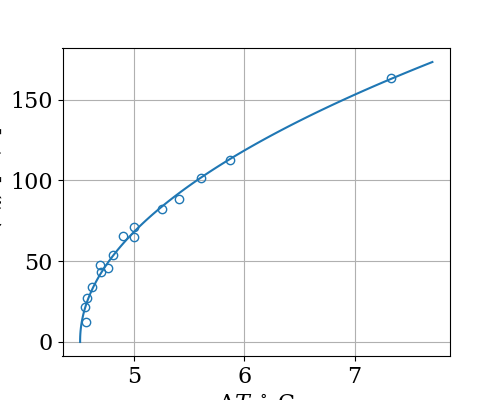

In [32]:
fig0,ax0 = plt.subplots(1,1,figsize=(5,4),sharex=True,sharey=True)


ax0.plot(data[0],data[1],'o',linestyle='none',markerfacecolor='none')
ax0.plot(p1(vxs),vxs,color=ck[0])
ax0.grid()
ax0.set_xlabel(r'$\Delta T$ $^\circ$ C')
ax0.set_ylabel(r'$\max(v_x)$ [m/s]')
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/conveccion/tikzs/paper_wesfreid.tikz')

<IPython.core.display.Javascript object>


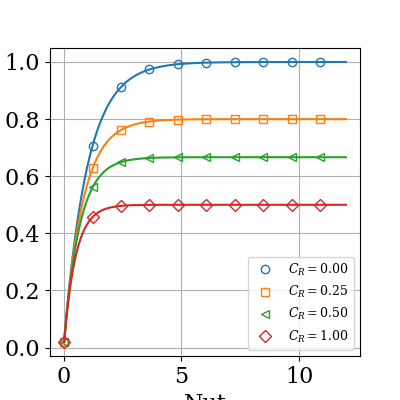

In [19]:
fig0,ax0 = plt.subplots(1,1,figsize=(4,4),sharex=True,sharey=True)
    
ax0.grid(which='both')
for j,Cr in enumerate([0,0.25,0.5,1]):
    data = []
    for A in np.linspace(0.1,60,100):
        Cmin = ht.calc_Cmin(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        Cmax = ht.calc_Cmax(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr = ht.calc_Cr(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr=.5
        NTU = ht.NTU_from_UA(UA=U*A, Cmin=Cmin)

        eff4 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='parallel')
        #print(NTU)
        data.append((NTU,eff4))
    data=np.asarray(data).T  
    ax0.plot(data[0],data[1])
    ax0.plot(data[0,::10],data[1,::10],marker=mk[j],color=ck[j],label='$C_R=%.2f$'%Cr,linestyle='none',markerfacecolor='none')
    #ax0.text(5,0.4,r'$C_R=%.2f$'%Cr,fontsize=12,bbox={'edgecolor':'black','facecolor':ck[0], 'alpha':0.1,'boxstyle':'round'})
    ax0.legend()

    ax0.set_xlabel(r'Nut')
    ax0.set_ylabel(r'$\varepsilon$')
    #fig0s[j].tight_layout()
    tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/eficiencia_nut_paralelo.tikz')



<IPython.core.display.Javascript object>


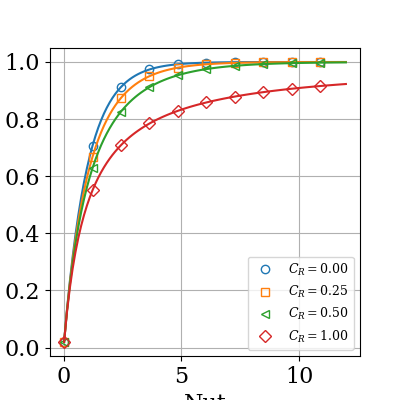

In [21]:
fig0,ax0 = plt.subplots(1,1,figsize=(4,4),sharex=True,sharey=True)
    
ax0.grid(which='both')
for j,Cr in enumerate([0,0.25,0.5,1]):
    data = []
    for A in np.linspace(0.1,60,100):
        Cmin = ht.calc_Cmin(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        Cmax = ht.calc_Cmax(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr = ht.calc_Cr(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr=.5
        NTU = ht.NTU_from_UA(UA=U*A, Cmin=Cmin)

        eff4 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='counterflow')
        #print(NTU)
        data.append((NTU,eff4))
    data=np.asarray(data).T  
    ax0.plot(data[0],data[1])
    ax0.plot(data[0,::10],data[1,::10],marker=mk[j],color=ck[j],label='$C_R=%.2f$'%Cr,linestyle='none',markerfacecolor='none')
    #ax0.text(5,0.4,r'$C_R=%.2f$'%Cr,fontsize=12,bbox={'edgecolor':'black','facecolor':ck[0], 'alpha':0.1,'boxstyle':'round'})
    ax0.legend()

    ax0.set_xlabel(r'Nut')
    ax0.set_ylabel(r'$\varepsilon$')
    #fig0s[j].tight_layout()
    tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/eficiencia_nut_cc.tikz')



In [52]:
ax0.grid?

<IPython.core.display.Javascript object>


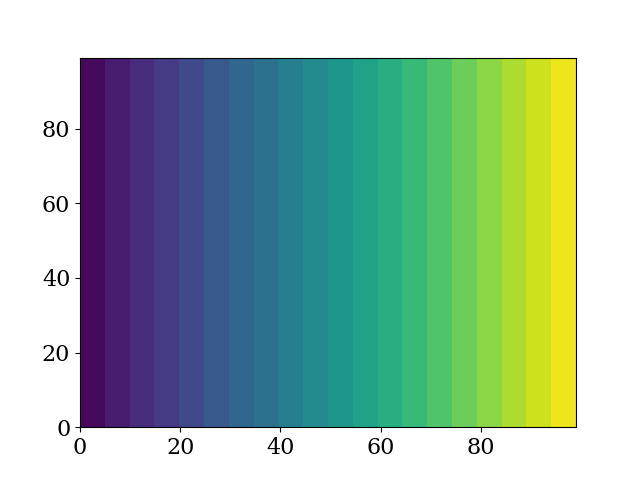

In [24]:
x1 = np.linspace(0,1,100)
x,y=np.meshgrid(x1,x1)
fig1,ax1= plt.subplots()
ax1.contourf(x,20)

In [25]:
cmap = matplotlib.cm.get_cmap('viridis')

In [31]:
cmap(128)

(0.127568, 0.566949, 0.550556, 1.0)